# Split and Standardization of DataFrame using apply

## 0. Get USArrests dataset

In [1]:
library(MASS)

In [2]:
data(Cars93)

In [3]:
str(Cars93)

'data.frame':	93 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

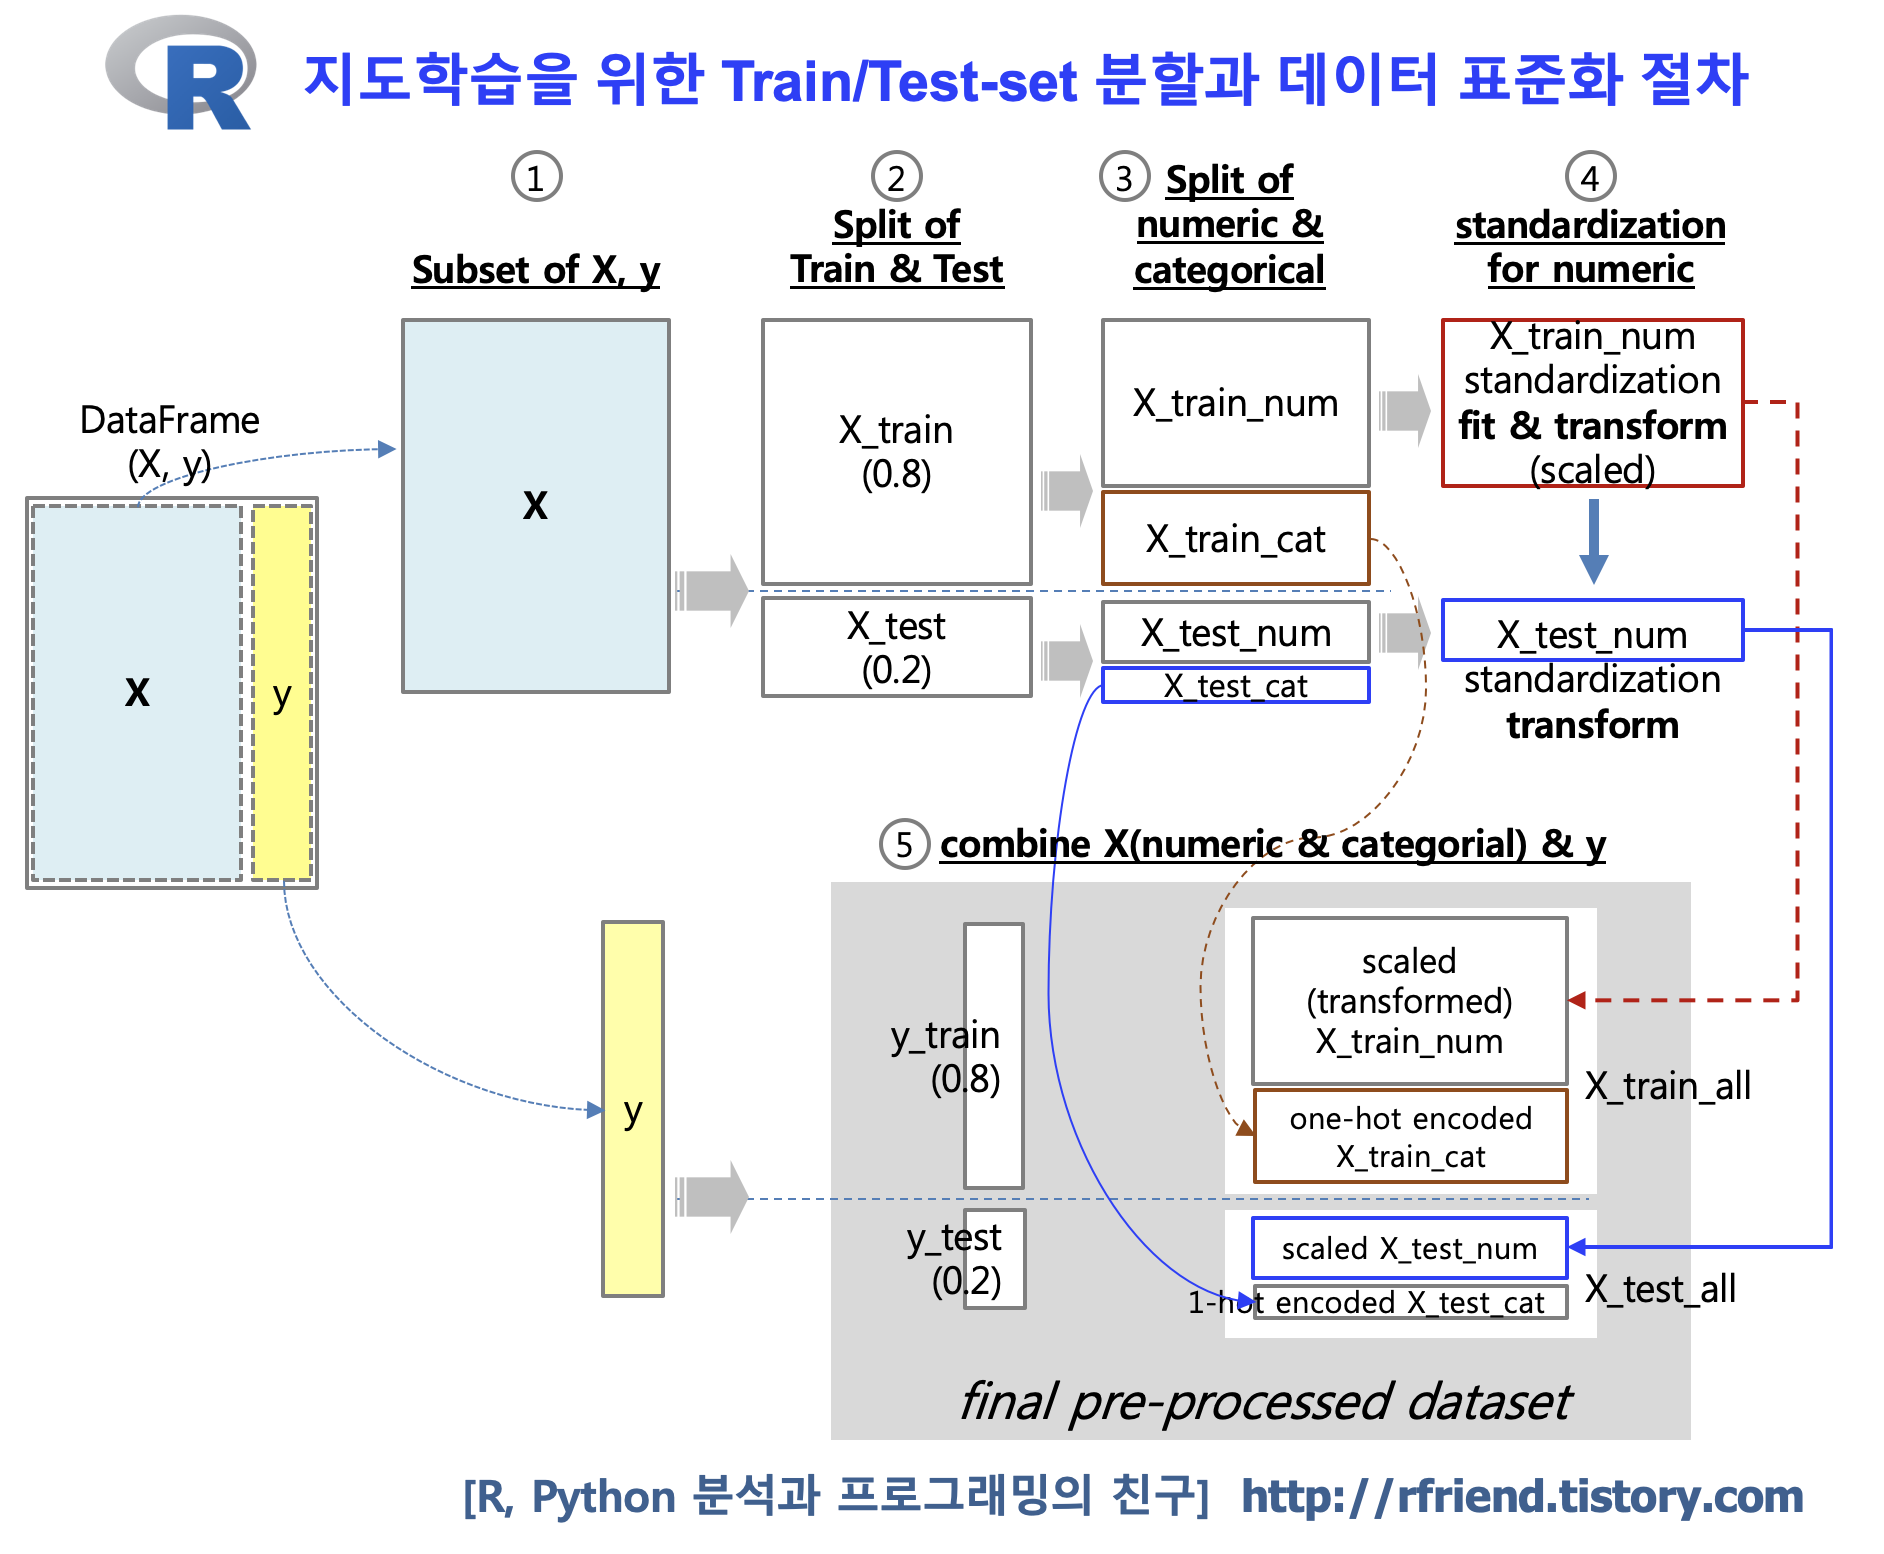

In [4]:
library(IRdisplay)
display_png(file="process_of_split_train_test_standardization_getdummy.PNG")

## 1. split of X, y

In [5]:
X <- subset(Cars93, select=c('Price', 'Horsepower', 'RPM', 'Length', 'Type', 'Origin'))
head(X)

Price,Horsepower,RPM,Length,Type,Origin
<dbl>,<int>,<int>,<int>,<fct>,<fct>
15.9,140,6300,177,Small,non-USA
33.9,200,5500,195,Midsize,non-USA
29.1,172,5500,180,Compact,non-USA
37.7,172,5500,193,Midsize,non-USA
30.0,208,5700,186,Midsize,non-USA
15.7,110,5200,189,Midsize,USA


In [6]:
table(X$Origin)


    USA non-USA 
     48      45 

In [7]:
y <- Cars93$MPG.highway
y

[1] 31 25 26 26 30 31 28 25 27 25 25 36 34 28 29 23 20 26 25 28 28 26 33 29 27
[26] 21 27 24 33 28 33 30 27 29 30 20 30 26 50 36 31 46 31 33 29 34 27 22 24 23
[51] 26 26 37 36 34 24 25 29 25 26 26 33 24 33 30 23 26 31 31 23 28 30 41 31 28
[76] 27 28 26 38 37 30 30 43 37 32 29 22 33 21 30 25 28 28

## 2. Split of Train, Test set
- (2-1) by random sampling
- (2-2) by sequential sampling
- (2-3) by stratified random sampling

### (2-1) Split of Train, Test set by Random Sampling

In [8]:
# (1) index for splitting data into Train and Test set
set.seed(1004) # for reprodicibility
train_idx <- sample(1:nrow(X), size=0.8*nrow(X), replace=F) # train-set 0.8, test-set 0.2
test_idx <- (-train_idx)

In [9]:
X_train <- X[train_idx,]
y_train <- y[train_idx]
X_test <- X[test_idx,]
y_test <- y[test_idx]

In [10]:
print(paste0('X_train: ', nrow(X_train)))
print(paste0('y_train: ', length(y_train)))
print(paste0('X_test: ', nrow(X_test)))
print(paste0('y_test: ', length(y_test)))

[1] "X_train: 74"
[1] "y_train: 74"
[1] "X_test: 19"
[1] "y_test: 19"


### (2-2) Split of Train, Test set by Sequential Sampling

In [11]:
# sequential sampling
test_size <- 0.2
test_num <- ceiling(nrow(X) * test_size)
train_num <- nrow(X) - test_num

X_train <- X[1:train_num,]
X_test <- X[(train_num+1):nrow(X),]
y_train <- y[1:train_num]
y_test <- y[(train_num+1):length(y)]

###  (2-3) Split of Train, Test set by Stratified Random Sampling

In [12]:
# UDF of split of train and test set using random sampling
random_split <- function(X, y
                         , test_size
                         , shuffle
                         , random_state) {
    
    test_num <- ceiling(nrow(X) * test_size)
    train_num <- nrow(X) - test_num
    
    if (shuffle == TRUE) {
        # shuffle == True
        set.seed(random_state) # for reprodicibility
        test_idx <- sample(1:nrow(X), size=test_num, replace=F)
        train_idx <- (-test_idx)
            
        X_train <- X[train_idx,]
        X_test <- X[test_idx,]
        y_train <- y[train_idx]
        y_test <- y[test_idx]
    } else {
        # shuffle == False
        X_train <- X[1:train_num,]
        X_test <- X[(train_num+1):nrow(X),]
        y_train <- y[1:train_num]
        y_test <- y[(train_num+1):length(y)]
    }
    
    return (list(X_train, X_test, y_train, y_test))
}


# UDF of split of train and test set using stratified random sampling
train_test_split <- function(X, y
                             , test_size=0.2
                             , shuffle=TRUE
                             , random_state=2004
                             , stratify=FALSE, strat_col=NULL){
                        
    if (stratify == FALSE){ # simple random sampling
        split <- random_split(X, y, test_size, shuffle, random_state)
        X_train <- split[1]
        X_test  <- split[2]
        y_train <- split[3]
        y_test  <- split[4]
    } else { # --- stratified random sampling
        strata <- unique(as.character(X[,strat_col]))
        X_train <- data.frame()
        X_test  <- data.frame()
        y_train <- vector()
        y_test  <- vector()
        for (stratum in strata){
            X_stratum <- X[X[strat_col] == stratum, ]
            y_stratum <- y[X[strat_col] == stratum]
            split_stratum <- random_split(X_stratum, y_stratum, test_size, shuffle, random_state)
            X_train <- rbind(X_train, data.frame(split_stratum[1]))
            X_test  <- rbind(X_test,  data.frame(split_stratum[2]))
            y_train <- c(y_train, unlist(split_stratum[3]))
            y_test  <- c(y_test,  unlist(split_stratum[4]))
        }
    }
    return (list(X_train, X_test, y_train, y_test))
}

###  (2-3) example: split of train, test set using stratified random sampling by 'Origin' strata

In [13]:
split_list <- train_test_split(X, y
                               , test_size=0.2
                               , shuffle=TRUE
                               , random_state=2004
                               , stratify=TRUE, strat_col='Origin')

X_train <- data.frame(split_list[1])
X_test  <- data.frame(split_list[2])
y_train <- unlist(split_list[3])
y_test  <- unlist(split_list[4])

In [14]:
print(paste0('Dim of X_train: ', nrow(X_train), ', ', ncol(X_train)))
print(paste0('Dim of X_test:  ', nrow(X_test), ', ', ncol(X_test)))
print(paste0('Length of y_train: ', length(y_train)))
print(paste0('Length of y_test:  ', length(y_test)))

[1] "Dim of X_train: 74, 6"
[1] "Dim of X_test:  19, 6"
[1] "Length of y_train: 74"
[1] "Length of y_test:  19"


In [15]:
X_test

,Price,Horsepower,RPM,Length,Type,Origin
,<dbl>,<int>,<int>,<int>,<fct>,<fct>
44,8.0,81,5500,168,Small,non-USA
2,33.9,200,5500,195,Midsize,non-USA
39,8.4,55,5700,151,Small,non-USA
40,12.5,90,5400,164,Sporty,non-USA
3,29.1,172,5500,180,Compact,non-USA
53,8.3,82,5000,164,Small,non-USA
45,10.0,124,6000,172,Small,non-USA
90,20.0,134,5800,180,Compact,non-USA
42,12.1,102,5900,173,Small,non-USA


In [16]:
table(X$Origin)


    USA non-USA 
     48      45 

In [17]:
table(X_test$Origin)


    USA non-USA 
     10       9 

In [18]:
y_test

[1] 33 25 50 36 26 37 29 30 46 23 28 25 41 36 25 33 20 31 28

In [19]:
# split of train, test set by random sampling using train_test_split() function
split_list <- train_test_split(X, y
                               , test_size=0.2
                               , shuffle=TRUE
                               , random_state=2004
                               , stratify=FALSE)

X_train <- data.frame(split_list[1])
X_test  <- data.frame(split_list[2])
y_train <- unlist(split_list[3])
y_test  <- unlist(split_list[4])

In [20]:
# split of train, test set by sequential sampling using train_test_split() function
split_list <- train_test_split(X, y
                               , test_size=0.2
                               , shuffle=FALSE
                               , random_state=2004
                               , stratify=FALSE)

X_train <- data.frame(split_list[1])
X_test  <- data.frame(split_list[2])
y_train <- unlist(split_list[3])
y_test  <- unlist(split_list[4])

## 3. Standardization of DataFrame with multiple Numeric Variables
- (3-1) z-standardization
- (3-2) [0-1] transformation (normalization)

### (3-1) z-standardization

In [21]:
# split numeric, categorical variables
X_train_num <- X_train[, c('Price', 'Horsepower', 'RPM', 'Length')]
X_train_cat <- X_train[, c('Type', 'Origin')]
X_test_num  <- X_test[ , c('Price', 'Horsepower', 'RPM', 'Length')]
X_test_cat  <- X_test[ , c('Type', 'Origin')]

In [22]:
# (1) Z Standardization
# (1-1) using scale() function
X_mean   <- apply(X_train_num, 2, mean)
X_stddev <- apply(X_train_num, 2, sd)

print('---- Mean ----')
print(X_mean)
print('---- Standard Deviation ----')
print(X_stddev)

[1] "---- Mean ----"
     Price Horsepower        RPM     Length 
  19.94595  148.50000 5258.10811  184.79730 
[1] "---- Standard Deviation ----"
     Price Horsepower        RPM     Length 
  10.32200   54.59571  624.33675   14.54137 


In [23]:
X_train_num_scaled <- scale(X_train_num, center=X_mean, scale = X_stddev)
head(X_train_num_scaled)

Price,Horsepower,RPM,Length
-0.3919732,-0.1556899,1.66879797,-0.53621469
1.3518755,0.9432975,0.38743818,0.70163274
0.8868492,0.4304367,0.38743818,-0.32990679
1.7200213,0.4304367,0.38743818,0.56409414
0.9740416,1.0898292,0.70777813,0.08270903
-0.4113493,-0.7051836,-0.09307174,0.28901693


In [24]:
# note that 'mean' and 'stddev' are calculated using X_train_num dataset (NOT using X_test_num)
X_test_num_scaled <- scale(X_test_num, center=X_mean, scale = X_stddev)
head(X_test_num_scaled)

,Price,Horsepower,RPM,Length
75,-0.2175883,0.2106393,-1.0540916,0.77040204
76,-0.1400839,0.9432975,-0.4134117,0.70163274
77,0.4315109,0.3938038,-0.7337516,-0.53621469
78,0.8480970,-0.1556899,1.1882880,-0.05482958
79,-0.8569995,-1.1630950,-0.4134117,-0.60498399
80,-1.1185768,-1.3828925,0.5476082,-2.66806305


In [25]:
# combine X_train_scaled, X_train_cat
X_train_scaled <- cbind(X_train_num_scaled, X_train_cat)

In [26]:
# combine X_trest_scaled, X_test_cat
X_test_scaled <- cbind(X_test_num_scaled, X_test_cat)

### (3-2) [0-1] transformation (normalization)

In [27]:
# (2) [0-1] Normalization
# 0-1 transformation
X_max <- apply(X_train_num, 2, max)
X_min <- apply(X_train_num, 2, min)
X_train_num_scaled <- scale(X_train_num, center = X_min, scale = (X_max - X_min))
X_test_num_scaled <- scale(X_test_num, center = X_min, scale = (X_max - X_min))

In [28]:
head(X_train_num_scaled)

Price,Horsepower,RPM,Length
0.1559633,0.3469388,0.9259259,0.4615385
0.4862385,0.5918367,0.6296296,0.6923077
0.3981651,0.4775510,0.6296296,0.5000000
0.5559633,0.4775510,0.6296296,0.6666667
0.4146789,0.6244898,0.7037037,0.5769231
0.1522936,0.2244898,0.5185185,0.6153846


In [29]:
head(X_test_num_scaled)

,Price,Horsepower,RPM,Length
75,0.18899083,0.42857143,0.2962963,0.70512821
76,0.20366972,0.59183673,0.4444444,0.69230769
77,0.31192661,0.46938776,0.3703704,0.46153846
78,0.39082569,0.34693878,0.8148148,0.55128205
79,0.06788991,0.12244898,0.4444444,0.44871795
80,0.01834862,0.07346939,0.6666667,0.06410256


In [30]:
# combine X_train_scaled, X_train_cat
X_train_scaled <- cbind(X_train_num_scaled, X_train_cat)

In [31]:
# combine X_trest_scaled, X_test_cat
X_test_scaled <- cbind(X_test_num_scaled, X_test_cat)

The end.